<img src="imgs/dh_logo.png" align="right" width="50%">

# Visualização do Gradient Boost para Regression Trees (GBRT)

#### O site [Brillantly Wrong](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) tem uma apresentação explicativa do `Gradient Boost`.

<img src="gradient_boost_example.png" align="center" width="50%">

-------------

# GBRT com dados sintéticos

#### `Gradient Boosted Regression Trees` (GBRT) é uma técnica de aprendizado estatístico flexível e não paramétrica para classificação e regressão. Este exemplo mostra como usar o GBRT para `Machine Learning` em Python.

In [21]:
# dependencies
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import train_test_split

# generate synthetic data
X, y = make_hastie_10_2(n_samples=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
print(make_hastie_10_2)

<function make_hastie_10_2 at 0x1a207d1680>


## Gradient Boosting Classifier

#### O [`Scikit-learn`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) fornece dois estimadores para impulsionar o gradiente: [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) e [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

#### O método `.fit()` define o estado do estimador com base nos dados de treinamento. Normalmente, os dados são compostos de uma matriz `numpy` bidimensional `X` de forma (`n_samples`, `n_predictors`) que contém a chamada matriz de recurso e uma matriz `numpy` unidimensional `y` que contém as respostas (rótulos de classe ou valores de regressão).

#### Os estimadores que podem gerar previsões fornecem um método `.predict()`. No caso de regressão, `.predict()` retornará os valores de regressão previstos; ele retornará os rótulos de classe correspondentes no caso de classificação. Os classificadores que podem prever a probabilidade de associação à classe têm um método `.predict_proba()` que retorna uma matriz numérica bidimensional de forma (`n_samples`, `n_classes`) em que as classes são ordenadas lexicograficamente.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# fit estimator
est = GradientBoostingClassifier(n_estimators = 200, 
                                 max_depth = 3
                                )

# predict class labels for train data
est.fit(X_train, y_train)

# score on train data (accuracy)
acc = est.score(X_train, y_train)
print('ACC_train: %.4f' % acc)

# predict class labels for test data
pred = est.predict(X_test)

# score on test data (accuracy)
acc = est.score(X_test, y_test)

print('ACC_test: %.4f' % acc)

ACC_train: 0.9891
ACC_test: 0.9200


## Ground Truth Data

#### A maioria dos desafios na aplicação do GBRT com sucesso na prática pode ser ilustrada no contexto de um exemplo simples de ajuste de curvas. Abaixo, você pode ver um problema de regressão com um recurso `x` e a resposta correspondente `y`. Desenhamos $100$ pontos de dados de treinamento escolhendo aleatoriamente uma coordenada `x`, avaliando o `Ground Truth` (função senoide; linha azul clara) e adicionando algum ruído gaussiano aleatório. Além dos $100$ pontos de treinamento (azul), também desenhamos $100$ pontos de dados de teste (vermelho) que usaremos para avaliar nossa aproximação.

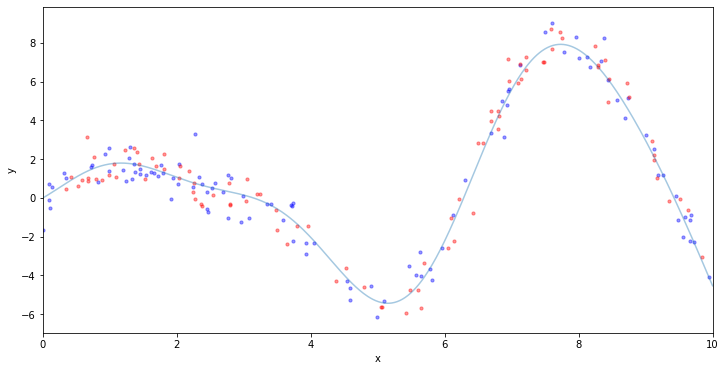

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ground truth: function to approximate
def ground_truth(x):
    return x * np.sin(x) + np.sin(2 * x)

# generate training and testing data
def gen_data(n_samples = 200):
    np.random.seed(13)
    x = np.random.uniform(0, 
                          10, 
                          size = n_samples
                         )
    x.sort()
    y = ground_truth(x) + 0.75 * np.random.normal(size = n_samples)
    train_mask = np.random.randint(0, 
                                   2, 
                                   size = n_samples
                                  ).astype(bool)
    x_train, y_train = x[train_mask, np.newaxis], y[train_mask]
    x_test, y_test = x[~train_mask, np.newaxis], y[~train_mask]
    return x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = gen_data(200)

# plot ground truth
x_plot = np.linspace(0, 10, 500)
def plot_data(figsize = (8, 5)):
    fig = plt.figure(figsize = figsize)
    gt = plt.plot(x_plot, 
                  ground_truth(x_plot), 
                  alpha = 0.4, 
                  label = 'ground truth'
                 )

# plot training and testing data
plot_data(figsize = (12, 6))
plt.scatter(X_train, 
            y_train, 
            s = 10, 
            alpha = 0.4, 
            color = 'blue'
           )
plt.scatter(X_test, 
            y_test, 
            s = 10, 
            alpha = 0.4, 
            color = 'red'
           )
plt.xlim((0, 10))
plt.ylabel('y')
plt.xlabel('x');

## Regression Tree

#### Se você ajustar uma `Regression Tree` individual aos dados acima, obterá uma aproximação constante por intervalo. Quanto mais funda a árvore, mais segmentos constantes você pode acomodar e, portanto, mais variância pode capturar.

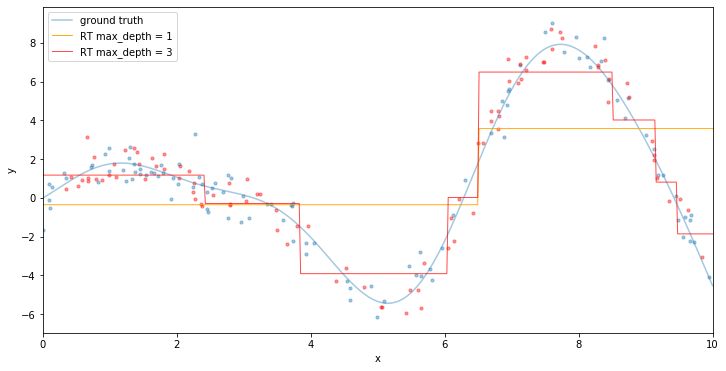

In [24]:
from sklearn.tree import DecisionTreeRegressor

plot_data(figsize = (12, 6))
plt.scatter(X_train, 
            y_train, 
            s = 10, 
            alpha = 0.4
           )

plt.scatter(X_test, 
            y_test, 
            s = 10, 
            alpha = 0.4, 
            color = 'red'
           )

plt.xlim((0, 10))
plt.ylabel('y')
plt.xlabel('x')

est = DecisionTreeRegressor(max_depth = 1).fit(X_train, y_train)

plt.plot(x_plot, 
         est.predict(x_plot[:, np.newaxis]),
         label = 'RT max_depth = 1', 
         color = 'orange', 
         alpha = 0.9, 
         linewidth = 1
        )

est = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)

plt.plot(x_plot, 
         est.predict(x_plot[:, np.newaxis]), 
         label = 'RT max_depth = 3', 
         color = 'red', 
         alpha = 0.7, 
         linewidth = 1
        )

plt.legend(loc = 'upper left');

## Gradient Boosting Regressor

#### Agora, vamos ajustar um modelo de `Gradient Boosting` aos dados de treinamento e ver como a aproximação progride à medida que adicionamos mais e mais árvores. Os estimadores de aumento de gradiente `scikit-learn` permitem avaliar a previsão de um modelo como uma função do número de árvores por meio dos métodos `staged_(predict|predict_proba)`. Eles retornam um gerador que itera sobre as previsões à medida que você adiciona mais e mais árvores

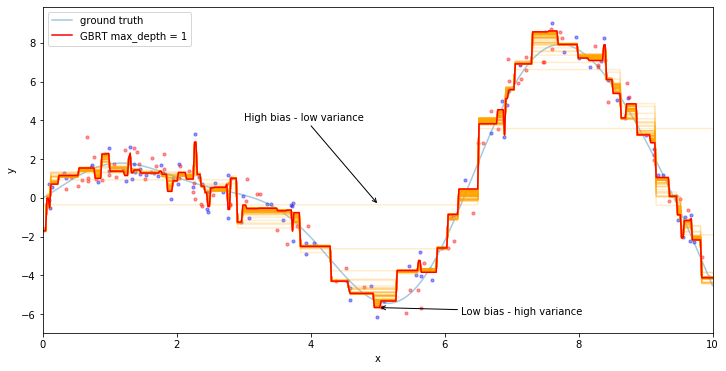

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from itertools import islice

plot_data(figsize = (12, 6))
plt.scatter(X_train, 
            y_train, 
            s = 10, 
            alpha = 0.4, 
            color = 'blue'
           )

plt.scatter(X_test, 
            y_test, 
            s = 10, 
            alpha = 0.4, 
            color = 'red'
           )

plt.xlim((0, 10))
plt.ylabel('y')
plt.xlabel('x')


est = GradientBoostingRegressor(n_estimators = 1000, 
                                max_depth = 1, 
                                learning_rate = 1.0
                               )

est.fit(X_train, y_train)

ax = plt.gca()
first = True

# step over prediction as we added 20 more trees.
for pred in islice(est.staged_predict(x_plot[:, np.newaxis]), 0, 1000, 10):
    plt.plot(x_plot, 
             pred, 
             color = 'orange', 
             alpha = 0.2
            )
    if first:
        ax.annotate('High bias - low variance', xy = (x_plot[x_plot.shape[0] // 2], 
                                                      pred[x_plot.shape[0] // 2]
                                                     ), 
                    xycoords = 'data', 
                    xytext = (3, 4), 
                    textcoords = 'data', 
                    arrowprops = dict(arrowstyle = "->", 
                                      connectionstyle = "arc"
                                     )
                   )

        first = False
        pred = est.predict(x_plot[:, np.newaxis])
        
plt.plot(x_plot, 
         pred, 
         color = 'red', 
         label = 'GBRT max_depth = 1'
        )
ax.annotate('Low bias - high variance', 
            xy = (x_plot[x_plot.shape[0] // 2], 
                  pred[x_plot.shape[0] // 2]), 
            xycoords = 'data', 
            xytext = (6.25, -6), 
            textcoords = 'data', 
            arrowprops = dict(arrowstyle = "->", 
                              connectionstyle = "arc"
                             )
           )
plt.legend(loc = 'upper left');

#### O gráfico acima mostra $50$ linhas de cor laranja, em que cada uma mostra a resposta do modelo GBRT após a adição de $20$ árvores. Começa com uma aproximação muito alta que só pode ser ativada em funções mais ou menos constantes (alta-baixa-variação), mas a medida que adicionamos mais árvores, mais variação do modelo pode ser capturada, resultando na linha vermelha contínua.

#### Podemos ver que quanto mais árvores adicionamos ao nosso modelo GBRT e quanto maior a profundidade adotada para as árvores, maior a variação que pode capturar, maior a complexidade do nosso modelo. Mas, em compensação, é preciso lidar com o problema do `Overfitting`. 

#### Um diagnóstico importante ao usar o GBRT na prática é o gráfico de desvio que mostra o erro de treinamento / teste (desvio) na função do número de árvores.

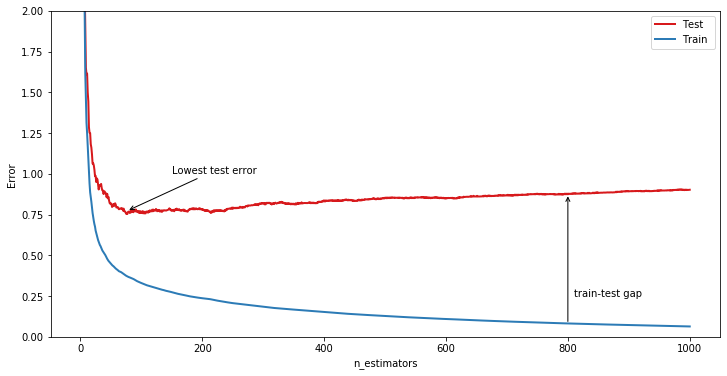

In [26]:
n_estimators = len(est.estimators_)

def deviance_plot(est, X_test, y_test, ax = None, label = '', train_color = '#2c7bb6', test_color = '#d7191c', alpha = 1.0):
#Deviance plot for ``est``, use ``X_test`` and ``y_test`` for test error.
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
        test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize = (12, 6))
        ax = plt.gca()
        ax.plot(np.arange(n_estimators) + 1, 
                test_dev, 
                color = test_color, 
                label = 'Test %s' % label,
                linewidth = 2, 
                alpha = alpha
               )
        
        ax.plot(np.arange(n_estimators) + 1, 
                est.train_score_, 
                color = train_color,
                label = 'Train %s' % label, 
                linewidth = 2, 
                alpha = alpha
               )
        
        ax.set_ylabel('Error')
        ax.set_xlabel('n_estimators')
        ax.set_ylim((0, 2))
        return test_dev, ax

test_dev, ax = deviance_plot(est, X_test, y_test)

ax.legend(loc = 'upper right')

# add some annotations
ax.annotate('Lowest test error', 
            xy = (test_dev.argmin() + 1, 
                  test_dev.min() + 0.02
                 ), 
            xycoords = 'data', 
            xytext = (150, 1.0), 
            textcoords = 'data', 
            arrowprops = dict(arrowstyle = "->", 
                              connectionstyle = "arc"), 
           )

ann = ax.annotate('', 
                  xy = (800, test_dev[799]), 
                  xycoords = 'data',
                  xytext = (800, est.train_score_[799]), 
                  textcoords = 'data', 
                  arrowprops = dict(arrowstyle = "->")
                 )
 
ax.text(810, 0.25, 'train-test gap');

-----------